# Data Science HW2

In [1]:
import psycopg2
import csv

## Task 1

### Task 1 (a)

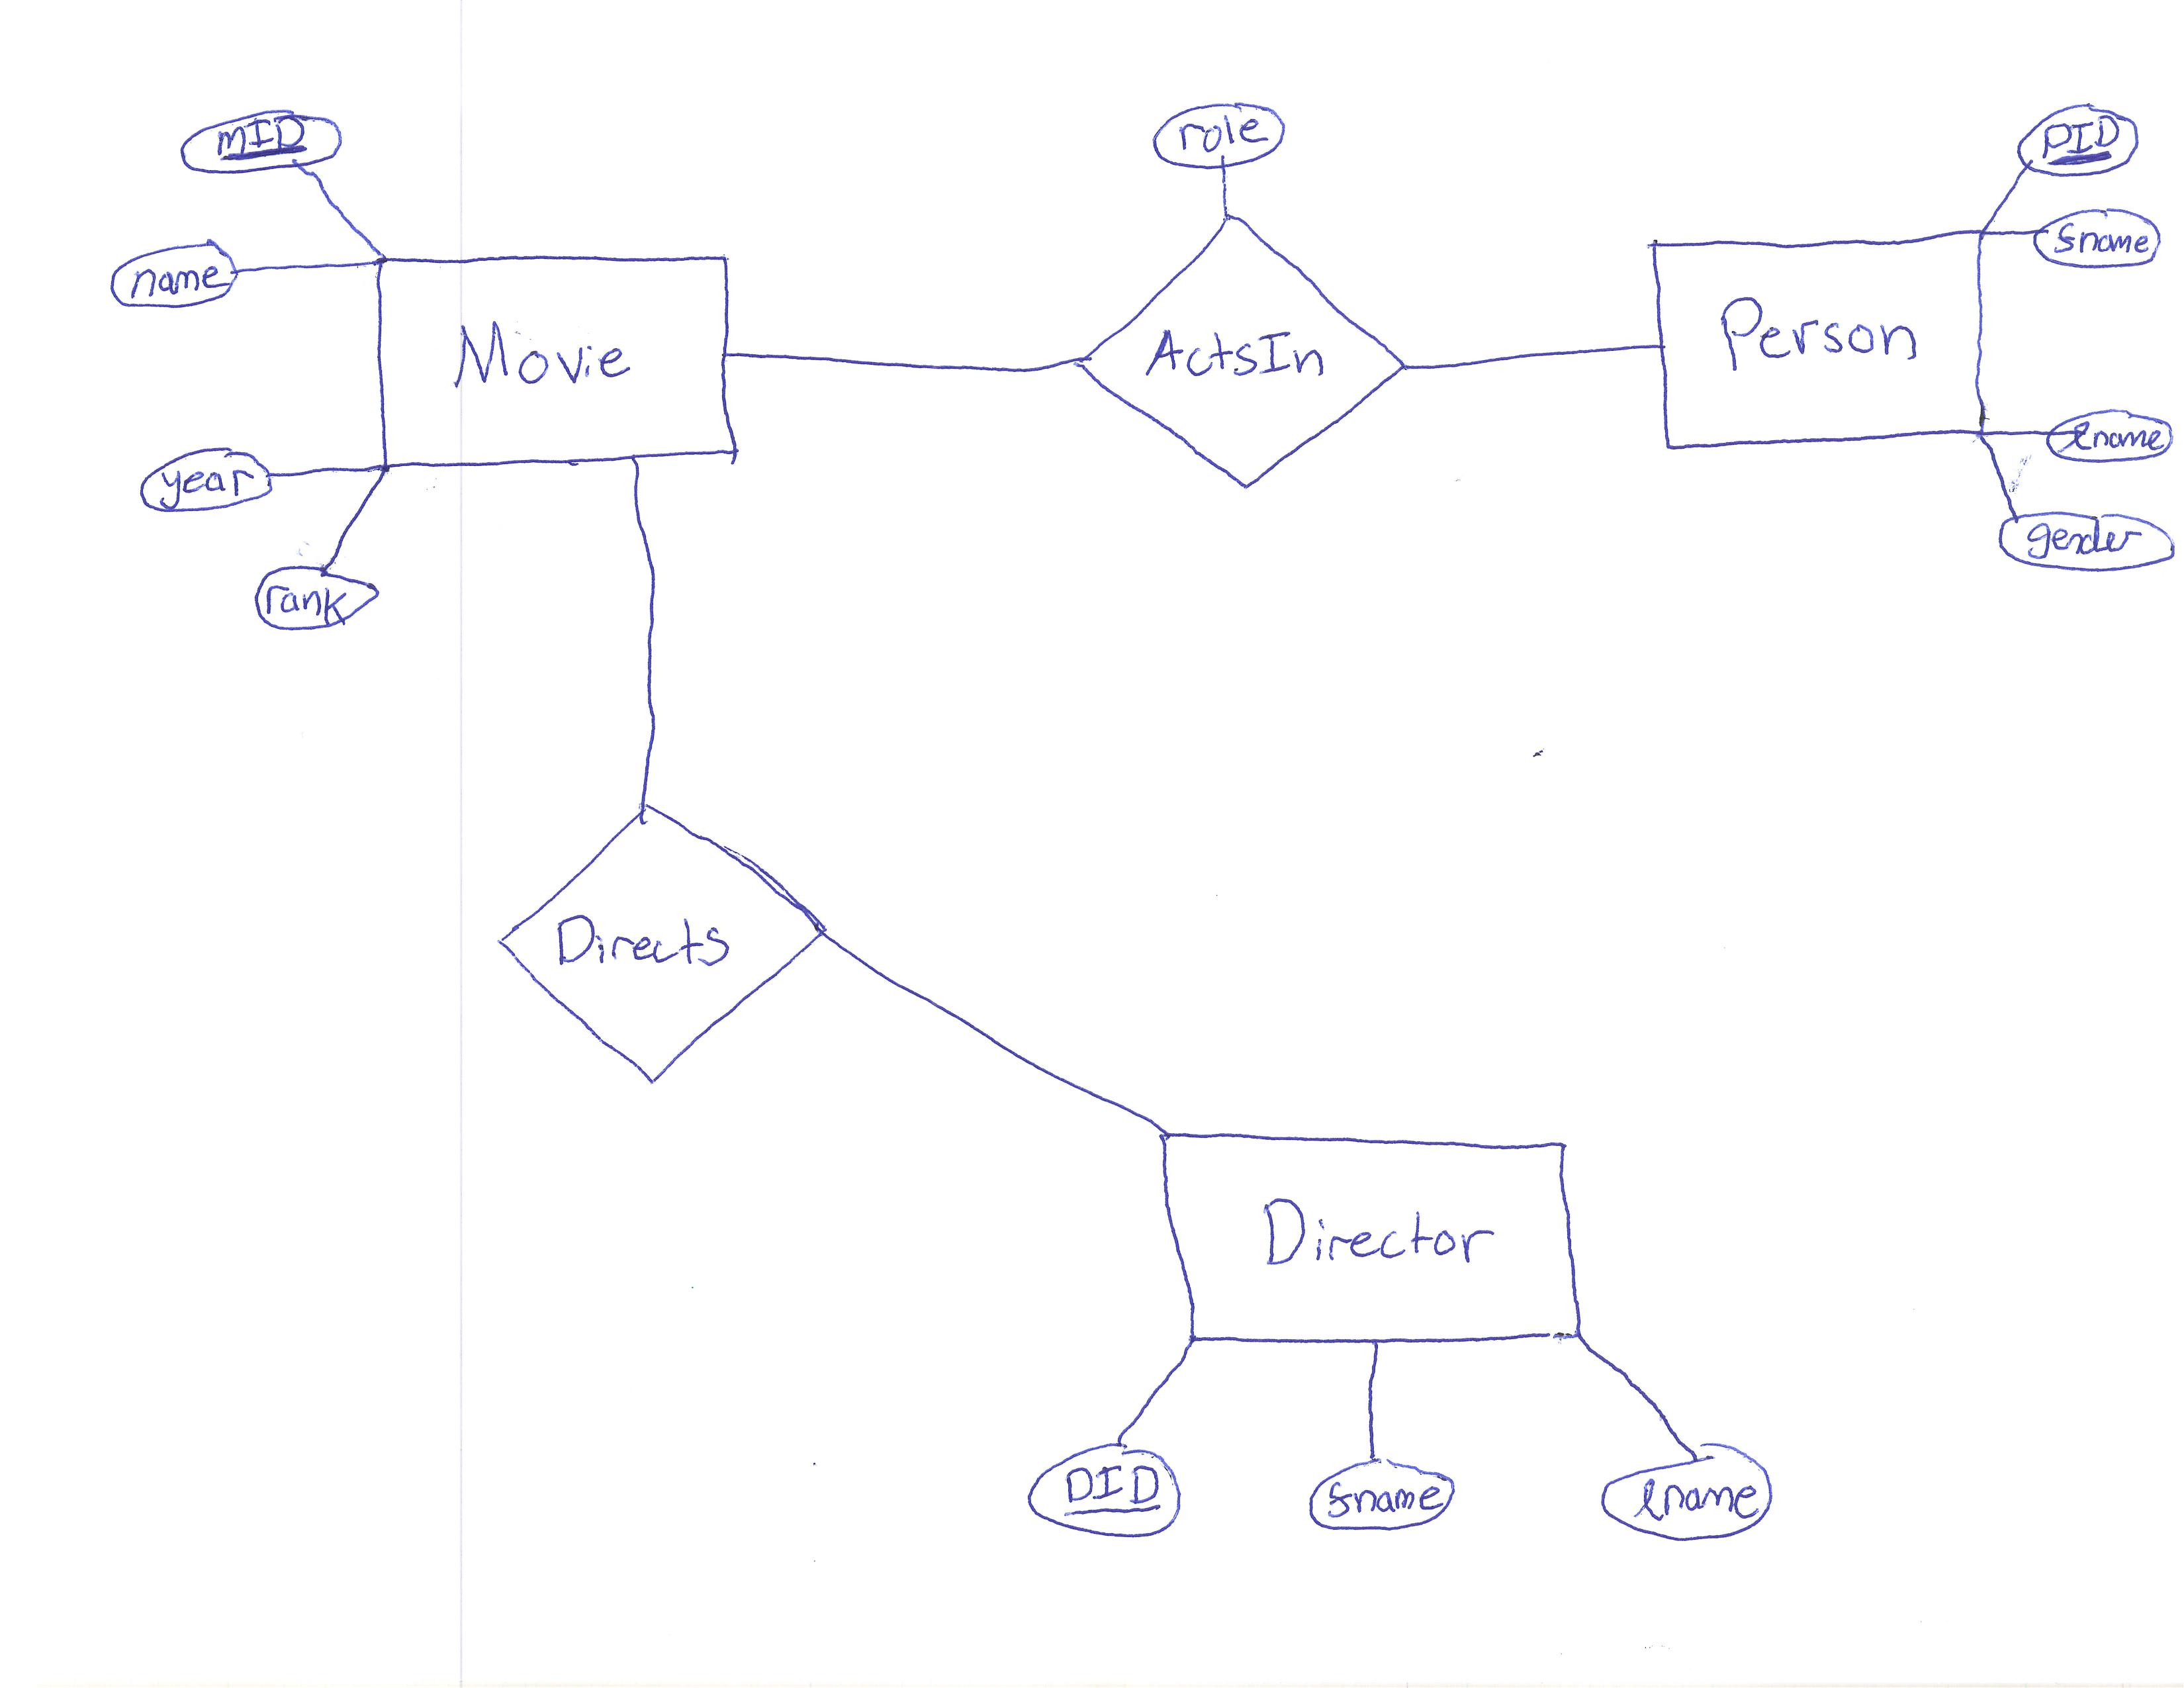

In this database schema, we have no directed arrows due to not having any one-to-one relationships of any kind. Directs and Actsin are both relations for the main data tables. The primary keys of each table is underlined.

### Task 1 (b)

Database Schema:

movie(<ins>MID</ins>, name, year, rank)

person(<ins>PID</ins>, fname, lname, gender)

director(<ins>DID</ins>, fname, lname)

actsin(<ins>MID</ins>, <ins>PID</ins>, role)

directs(<ins>MID</ins>, <ins>DID</ins>)

In this schema we get all data and relations. For actsin and directs, all keys are foreign keys as they are relational tables. However, due to the data format, when creating the tables they are not specified as foreign keys because the data has some IDs in the actsin and directs documents that don't exist in person or director.

## Task 2

### Task 2 (b)

Connect to database on local computer

In [2]:
conn = psycopg2.connect("host=localhost dbname=moviesdb user=postgres password=12345")
cur = conn.cursor()

Create all tables and specify primary and foreign key constraints

In [4]:
cur.execute("""
    CREATE TABLE Movie(
        mID integer PRIMARY KEY,
        name text,
        year integer,
        rank float
    )
""")

cur.execute("""
    CREATE TABLE Person(
        pID integer PRIMARY KEY,
        fname text,
        lname text,
        gender text
    )
""")

cur.execute("""
    CREATE TABLE Director(
        dID integer PRIMARY KEY,
        fname text,
        lname text
    )
""")

cur.execute("""
    CREATE TABLE ActsIn(
        pID integer,
        mID integer,
        role text,
        FOREIGN KEY (pID) REFERENCES Person(pID)
    )
""")

cur.execute("""
    CREATE TABLE Directs(
        dID integer,
        mID integer
    )
""")
conn.commit()

Now we can populate our tables with data from IMDB

In [5]:
#Fill Movie Table
with open('C:/Users/nicho/Google Drive/Data Science Applications/Homework/HW2/IMDB/IMDBMovie.txt', encoding = 'UTF8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if row[len(row)-1] == '':
                temp = None
            else:
                temp = row[len(row)-1]
            cur.execute("INSERT INTO Movie VALUES (%s, %s, %s, %s)",
                        (row[0], ", ".join(row[1:(len(row)-2)]), row[len(row)-2],temp))
            line_count += 1
    
conn.commit()

In [6]:
#Fill Person Table
cur.execute("""
    COPY Person FROM 'C:/Users/nicho/Google Drive/Data Science Applications/Homework/HW2/IMDB/IMDBPerson.txt' WITH (FORMAT CSV, HEADER true, encoding 'UTF8')
""")
conn.commit()

In [7]:
#Fill Director Table
cur.execute("""
    COPY Director FROM 'C:/Users/nicho/Google Drive/Data Science Applications/Homework/HW2/IMDB/IMDBDirectors.txt' WITH (FORMAT CSV, HEADER true, encoding 'UTF8')
""")
conn.commit()

In [8]:
#Fill ActsIn Table
with open('C:/Users/nicho/Google Drive/Data Science Applications/Homework/HW2/IMDB/IMDBCast.txt', encoding = 'UTF8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            if row[2] == '':
                temp = None
            else:
                temp = ", ".join(row[2:len(row)])
            cur.execute("INSERT INTO ActsIn VALUES (%s, %s, %s)",
                        (row[0], row[1], temp))
            line_count += 1
    
conn.commit()

In [9]:
#Fill Directs Table
cur.execute("""
    COPY Directs FROM 'C:/Users/nicho/Google Drive/Data Science Applications/Homework/HW2/IMDB/IMDBMovie_Directors.txt' WITH (FORMAT CSV, HEADER true, encoding 'UTF8')
""")
conn.commit()

In [10]:
cur.close()
conn.close()

## Task 4

In [85]:
conn = psycopg2.connect("host=localhost dbname=moviesdb user=postgres password=12345")
cur = conn.cursor()

### Task 4 (a)

In [86]:
def find_best_movies_in_years(k,start_year, end_year):
    cur.execute("""
        SELECT *
        FROM movie
        WHERE movie.rank IS NOT NULL AND movie.year >= %s AND movie.year <= %s
        ORDER BY movie.rank DESC
        LIMIT %s;
    """,
    (start_year, end_year, k))
    query = cur.fetchall()
    fields=['Movie ID','Name','Year','Rank']
    with open('task4.txt', 'w', newline='') as f:

        # using csv.writer method from CSV package
        write = csv.writer(f, delimiter =';')

        write.writerow(fields)
        write.writerows(query)

### Task 4 (b)

In [87]:
find_best_movies_in_years(20,1995,2004)

In [88]:
cur.close()
conn.close()